In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from modules.calibration import draw_keypoints_and_match, RANSAC_F_mat, compute_Essential_matrix
from modules.correspondence import ssd_correspondence
from modules.depth import disparity_to_depth
from modules import draw_show_img_utils as dsiu
from datasets.load_dataset import Data

In [2]:
def l2(x, y, eval_func = np.average):
    return eval_func((x-y)**2)

## 1. Load dataset

(<Figure size 1000x500 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

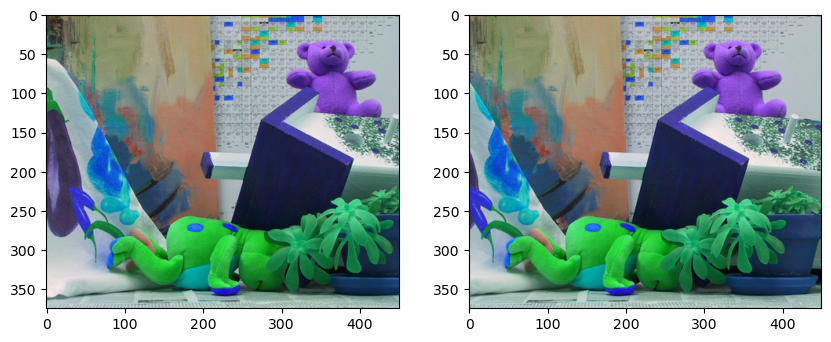

In [3]:
data = Data(5)
img1 = data.img1
img2 = data.img2

dsiu.draw_2_img(img1, img2)

## Matching key points

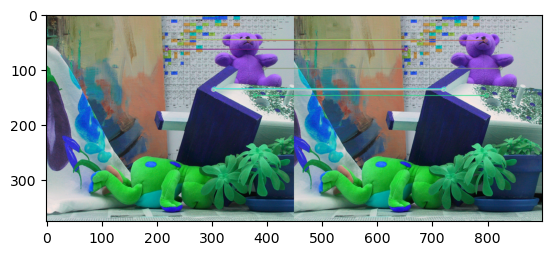

In [4]:
list_kp1, list_kp2, matched_image = draw_keypoints_and_match(img1, img2)
plt.imshow(matched_image)



## Calibration

In [5]:
F = RANSAC_F_mat(list_kp1, list_kp2)
print("F matrix", F)
print("=="*20, '\n')
K1 = data.calib["cam0"]
K2=data.calib["cam1"]
E = compute_Essential_matrix(F, K1, K2)
print("E matrix", E)
print("=="*20, '\n')
pts1 = np.asarray(list_kp1, dtype= np.float32)
pts2 = np.asarray(list_kp2, dtype=np.float32)

F matrix [[ 8.86286330e-06 -5.43023103e-05  4.48900742e-03]
 [ 6.08354066e-05  4.05207193e-06 -2.16635923e-02]
 [-1.09375319e-02  2.00606520e-02  9.99494108e-01]]

E matrix [[ 1.99414424e+01 -1.22180198e+02 -5.85272222e+00]
 [ 1.36879665e+02  9.11716185e+00 -1.31994133e+01]
 [ 3.99490177e+00  1.07827644e+01 -5.06151850e-02]]



Compare with cv2

In [6]:
def l2(x,y, eval_func = np.average):
    return eval_func((x-y)**2)

l2(F, cv2.findFundamentalMat(list_kp1, list_kp2)[0])

0.025290632919402166

## Correspondance

In [ ]:
disparity_map_unscaled, disparity_map_scaled = ssd_correspondence(img1, img2, 10)

img_n = cv2.normalize(src=disparity_map_scaled, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
heatmap1 = cv2.applyColorMap(img_n, cv2.COLORMAP_HOT)
plt.figure(1)
plt.title('Disparity Map Graysacle')
plt.imshow(disparity_map_scaled, cmap='gray')
plt.figure(2)
plt.title('Disparity Map Hot')
plt.imshow(disparity_map_scaled, cmap='jet')
plt.figure(3)
plt.title('Heat Map')
plt.imshow(heatmap1, cmap='jet')
print("Done Correspondance")

## Depth

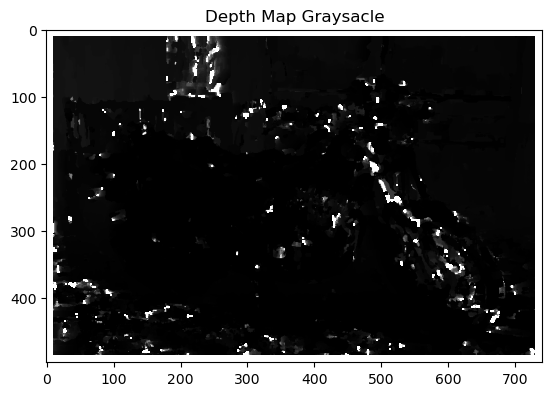

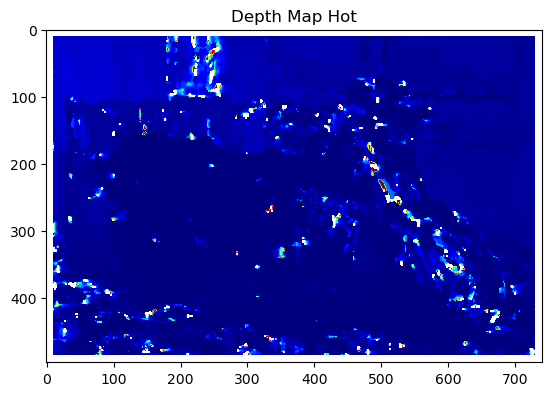

In [46]:
depth_map, depth_array = disparity_to_depth(data.calib['baseline'], data.calib["focal"], disparity_map_unscaled)

plt.figure(3)
plt.title('Depth Map Graysacle')
plt.imshow(depth_map, cmap='gray')
plt.figure(4)
plt.title('Depth Map Hot')
plt.imshow(depth_array, cmap="jet")
plt.show()

In [ ]:
depth_array

## Evaluation